# Classification Experiments

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np

## Gender

### Nouns, Adjectives, Both : split data into train and test  

In [2]:
df_nouns_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gn"])
df_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns = "number")
df_both_we = pd.concat([df_nouns_we, df_adj_we], ignore_index=True)

# target : gender
Y_gd_N = df_nouns_we["gender"]
Y_gd_A = df_adj_we["gender"]
Y_gd_both = df_both_we["gender"]

# features : word embeddings dimensions
X_gd_N = df_nouns_we.drop(columns=["Word", "gender"])
X_gd_A = df_adj_we.drop(columns=["Word", "gender"])
X_gd_both = df_both_we.drop(columns = ["Word", "gender"] )

# split data into train and test sets
X_gd_N_train, X_gd_N_test, Y_gd_N_train, Y_gd_N_test = train_test_split(X_gd_N, Y_gd_N, test_size=0.2, random_state=42)
X_gd_A_train, X_gd_A_test, Y_gd_A_train, Y_gd_A_test = train_test_split(X_gd_A, Y_gd_A, test_size=0.2, random_state=42)
X_gd_both_train, X_gd_both_test, Y_gd_both_train, Y_gd_both_test = train_test_split(X_gd_both, Y_gd_both, test_size=0.2, random_state=42)

In [3]:
train_features = [X_gd_N_train, X_gd_A_train, X_gd_both_train]
test_features = [X_gd_N_test, X_gd_A_test, X_gd_both_test]
train_targets = [Y_gd_N_train, Y_gd_A_train, Y_gd_both_train]
test_targets = [Y_gd_N_test, Y_gd_A_test, Y_gd_both_test]

###  Classifiers

#### 1. Decision Tree

In [16]:
# Execution time: ~30 sec

results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Add the tree
    results[i]["tree"] = clf

    # Compute precision, recall, F1 score and accuracy
    results[i]["precision"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][1,0])
    results[i]["recall"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][0,1])
    results[i]["f1"] = 2 * results[i]["precision"] * results[i]["recall"] / (results[i]["precision"] + results[i]["recall"])
    results[i]["accuracy"] = (results[i]["cm"][0,0] + results[i]["cm"][1,1]) / np.sum(results[i]["cm"])

    # Store the importance of each feature
    results[i]["importances"] = clf.feature_importances_

Experiment 1:

Most important features: [100, 250, 470, 195, 245, 499, 434, 162, 5, 316]
Precision: 0.5983805668016194
Recall: 0.5930979133226324
F1 score: 0.5957275292220878
Accuracy: 0.6212235649546828


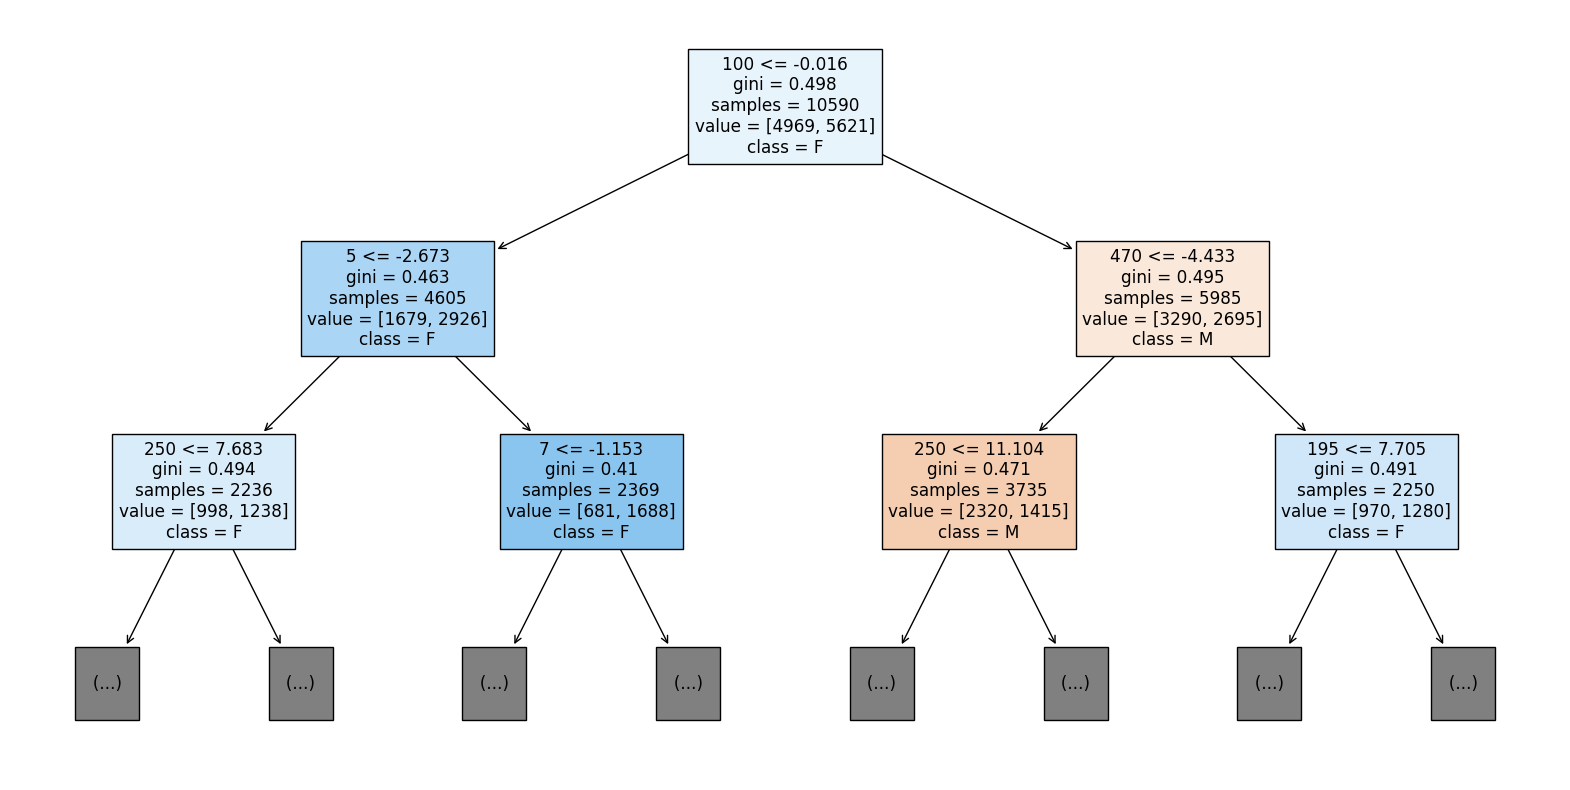

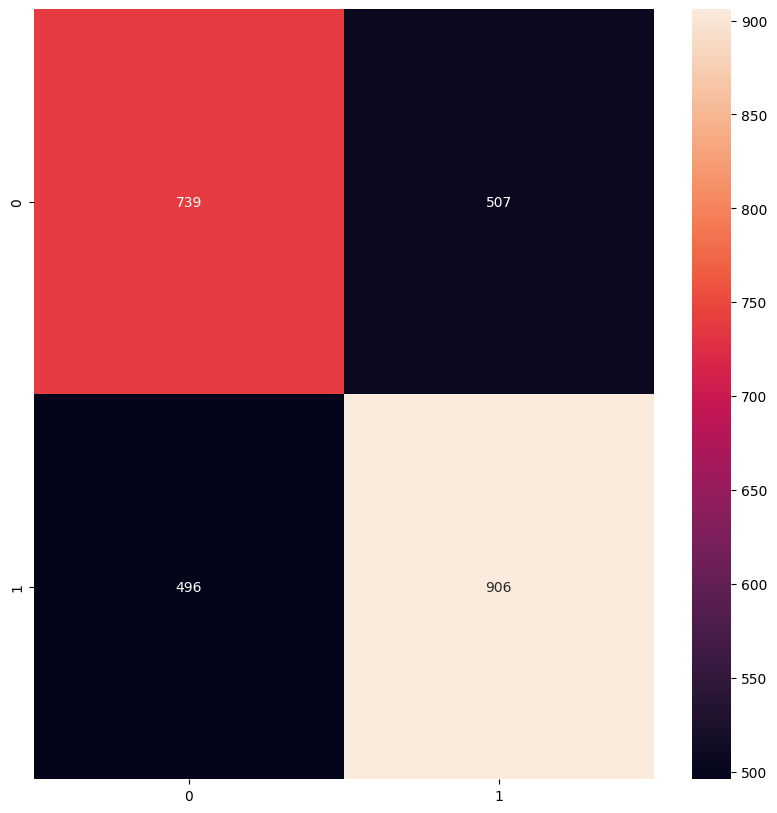

Experiment 2:

Most important features: [466, 5, 507, 57, 234, 250, 379, 390, 511, 432]
Precision: 0.659877800407332
Recall: 0.6849894291754757
F1 score: 0.6721991701244814
Accuracy: 0.7505919494869772


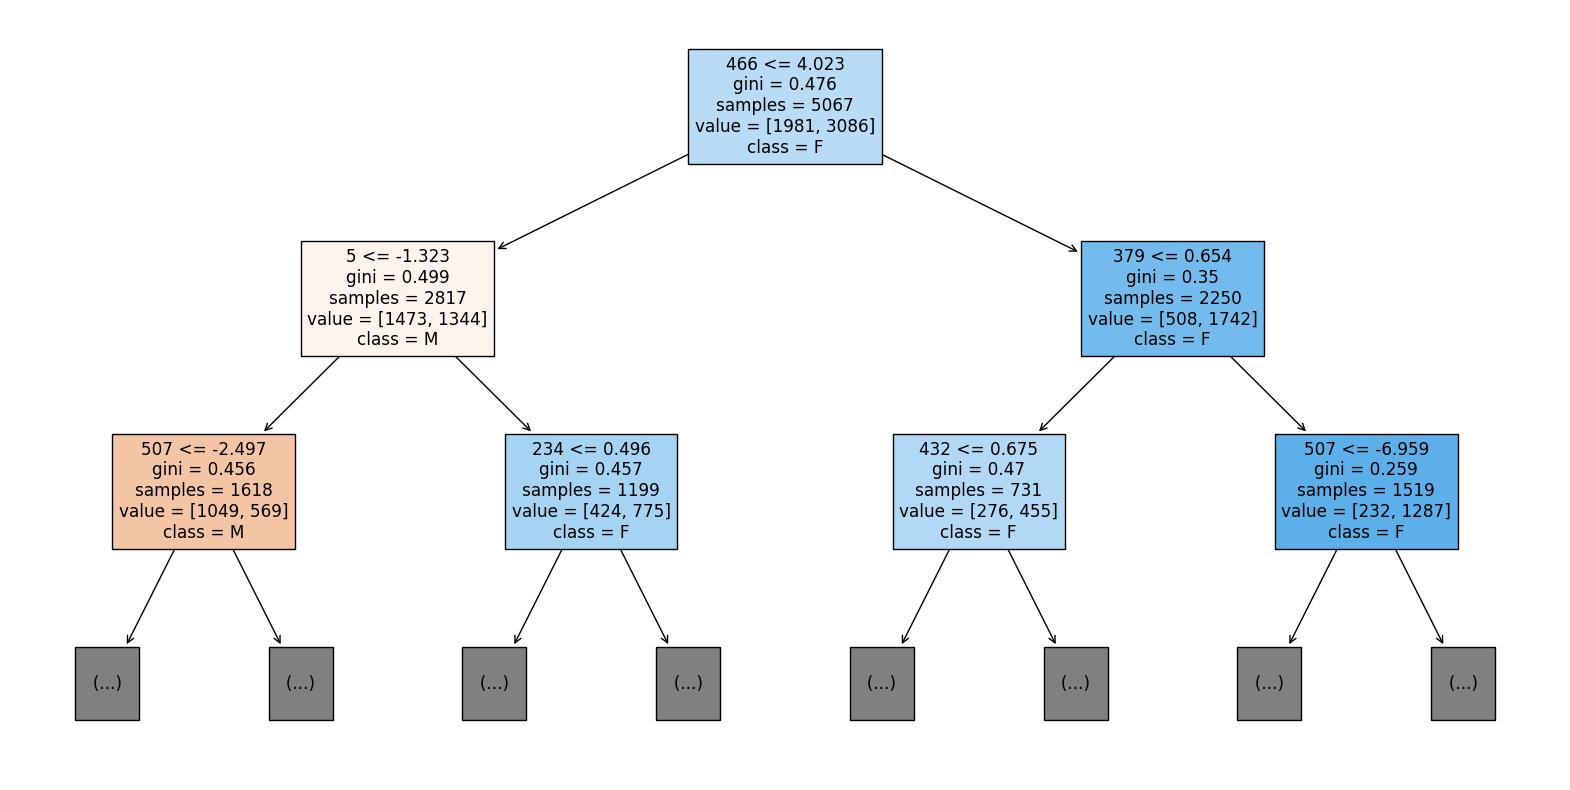

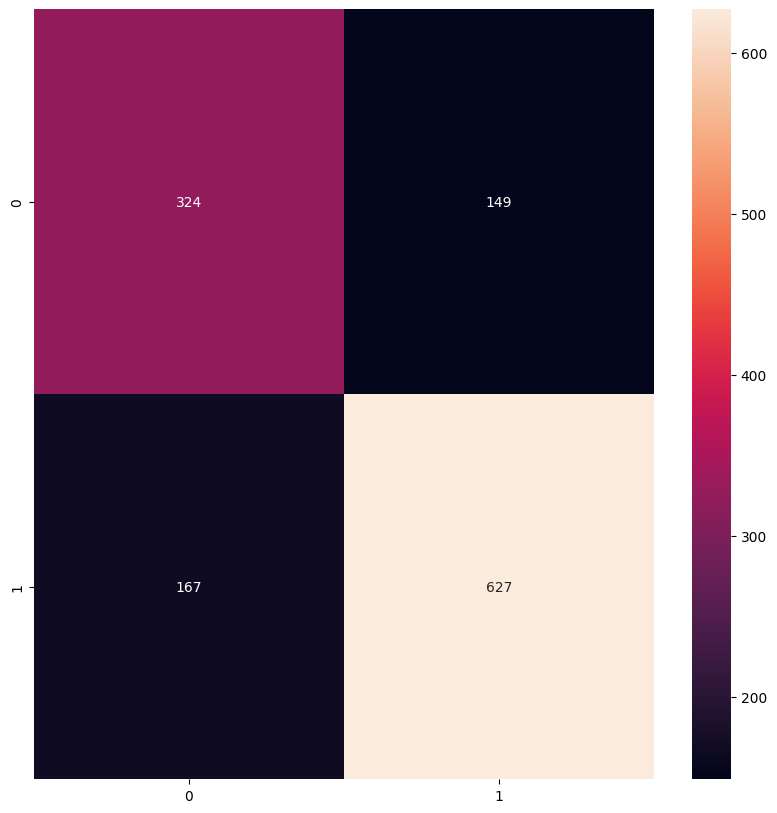

Experiment 3:

Most important features: [245, 192, 195, 377, 162, 507, 133, 117, 121, 487]
Precision: 0.6875732708089097
Recall: 0.6883802816901409
F1 score: 0.6879765395894429
Accuracy: 0.7282247765006385


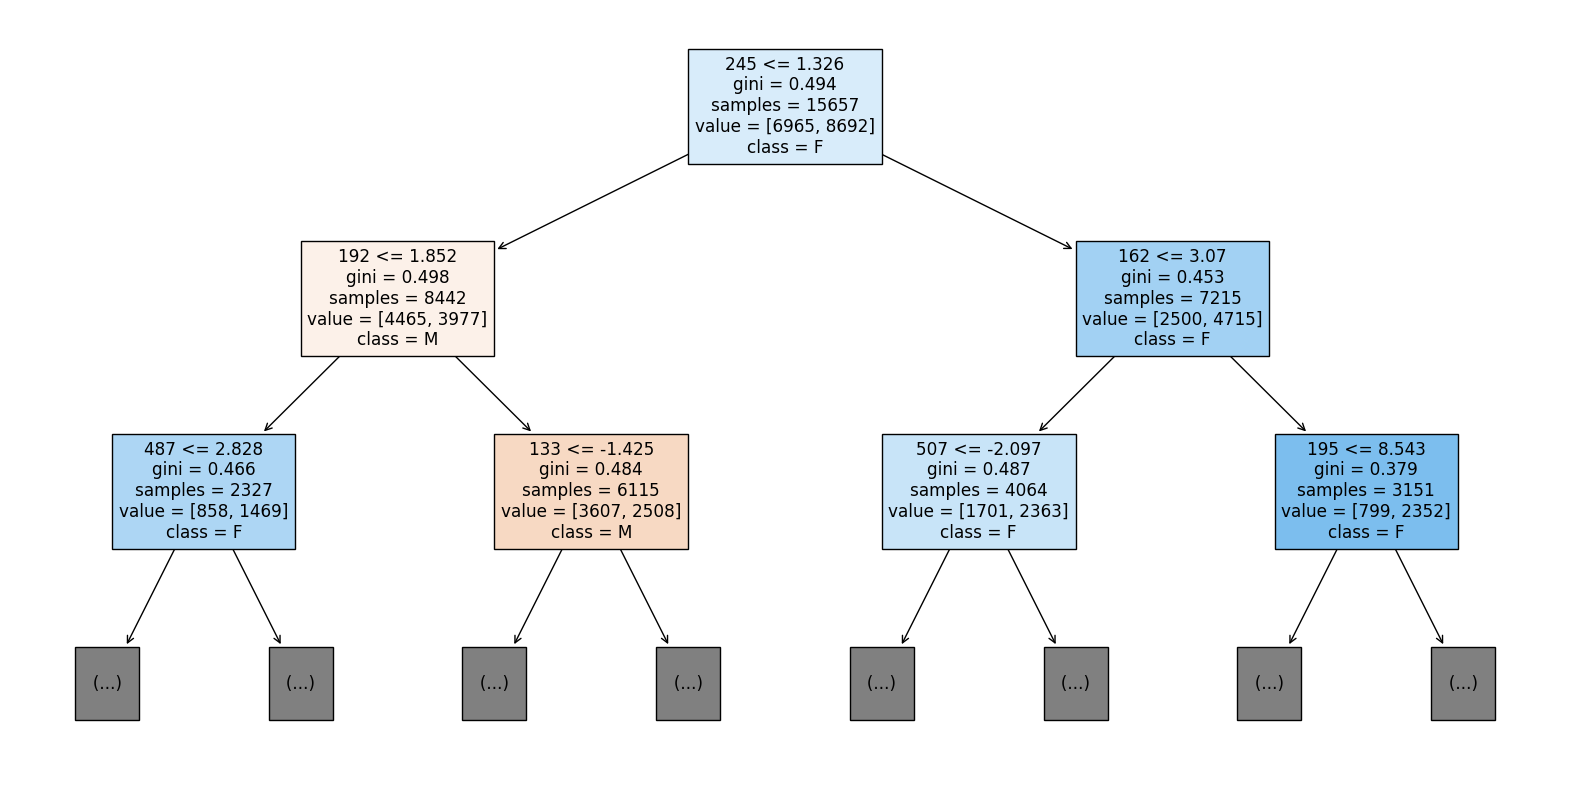

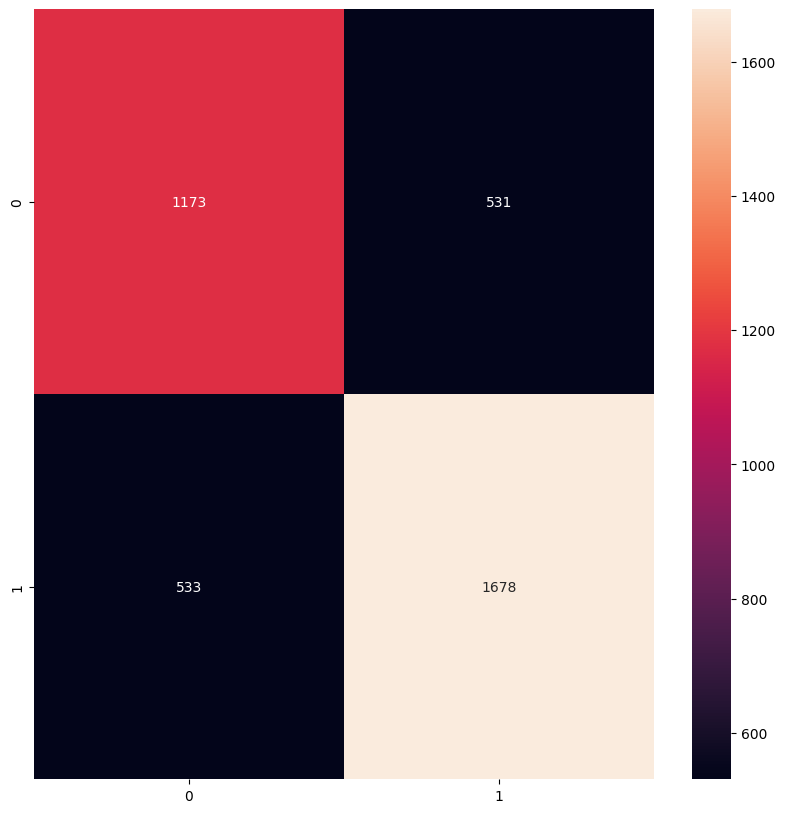

In [18]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results[i]['precision']}")
    print(f"Recall: {results[i]['recall']}")
    print(f"F1 score: {results[i]['f1']}")
    print(f"Accuracy: {results[i]['accuracy']}")

    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(results[i]["tree"], max_depth=2, feature_names=X_gd_N.columns, class_names=["M", "F"], filled=True)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(results[i]["cm"], annot=True, fmt="d")
    plt.show()

    

In [9]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results[0]["importances"])[::-1][:10])
adj = set(np.argsort(results[1]["importances"])[::-1][:10])
both = set(np.argsort(results[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {250, 5}
nouns and both: {162, 195, 245}
adj and both: {507}
all: set()


#### 2. Random Forest

In [11]:
# Do the same with Random Forest Classifier
# Execution time: ~ 2.15 min
results_rf = []

for i in range(3):

    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a random forest classifier with 100 trees
    clf = RandomForestClassifier(random_state=42, n_estimators=100)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results_rf.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    results_rf[i]["precision"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,0])
    results_rf[i]["recall"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][0,1])
    results_rf[i]["f1"] = 2 * results_rf[i]["precision"] * results_rf[i]["recall"] / (results_rf[i]["precision"] + results_rf[i]["recall"])
    results_rf[i]["accuracy"] = (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,1]) / np.sum(results_rf[i]["cm"])

    # Store the importance of each feature
    results_rf[i]["importances"] = clf.feature_importances_
    

Experiment 1:

Most important features: [100, 245, 195, 316, 192, 403, 377, 507, 117, 121]
Precision: 0.8215962441314554
Recall: 0.702247191011236
F1 score: 0.7572479446127217
Accuracy: 0.7881419939577039


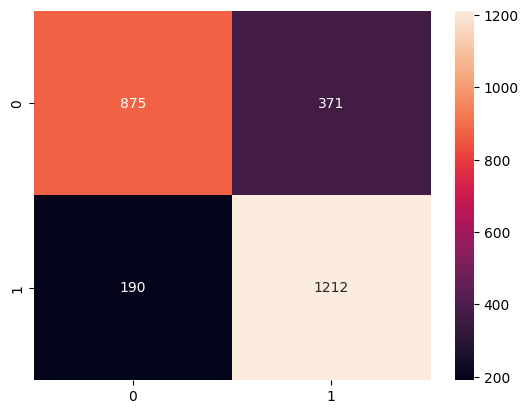

Experiment 2:

Most important features: [466, 503, 250, 439, 245, 133, 234, 121, 432, 38]
Precision: 0.9670886075949368
Recall: 0.8076109936575053
F1 score: 0.880184331797235
Accuracy: 0.9179163378058406


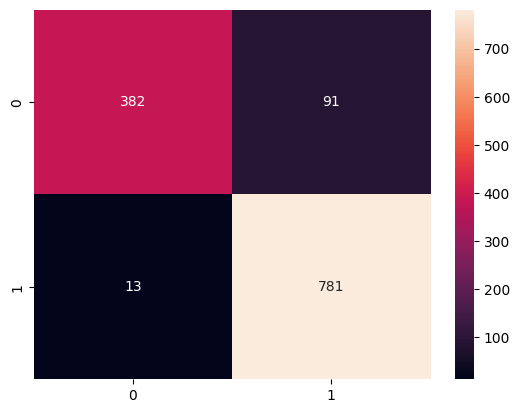

Experiment 3:

Most important features: [245, 507, 192, 121, 250, 195, 377, 5, 466, 133]
Precision: 0.8794373744139317
Recall: 0.7705399061032864
F1 score: 0.8213950578667499
Accuracy: 0.8541507024265645


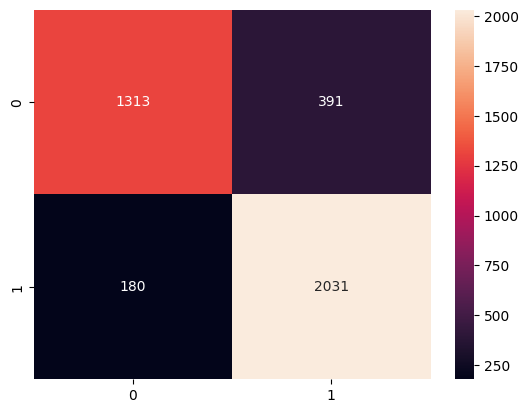

In [13]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results_rf[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results_rf[i]['precision']}")
    print(f"Recall: {results_rf[i]['recall']}")
    print(f"F1 score: {results_rf[i]['f1']}")
    print(f"Accuracy: {results_rf[i]['accuracy']}")

    # Plot confusion matrix
    sns.heatmap(results_rf[i]["cm"], annot=True, fmt="d")
    plt.show()


In [14]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results_rf[0]["importances"])[::-1][:10])
adj = set(np.argsort(results_rf[1]["importances"])[::-1][:10])
both = set(np.argsort(results_rf[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {121, 245}
nouns and both: {192, 121, 195, 245, 377, 507}
adj and both: {133, 466, 245, 121, 250}
all: {121, 245}
